### Photon-pair generation rates

DTU studied the quantum random number generation application. The impact of propagation and splitting loss for the PIC design of RUN2 has been investigated by numerically estimating the expected output rates of single photons and photon pairs (coincidences) under different conditions of input pumping rates, for a specific experiment scheme of QRNG based on contextuality.


The coincidence rates have been calculated by considering:

R_singles=R_pump⋅CE⋅α_filter⋅α_in⋅α_mesh⋅α_out⋅α_couplers,

Where R_pump is the pump rate, CE is the nonlinear generation rate, and α_filter,α_in,α_mesh,α_out,α_couplers, are the attenuations due to the filter, due to the waveguides up to the input of the mesh, due to the cascaded loss through the PUCs, due to the waveguides at the output from the mesh to the edge couplers, and due to the the edge couplers, respectively.
For the coincidence rates, the loss of signals (singles) and idlers are summed to obtain the final rate, with a probability p of generating photon pairs, in the case where only one source is active.
When all the six different sources are active, the overall probability of generating a pair can be approximated as 6*p, when p << number of sources. 
Both best-case values for propagation loss and worst-case values are compared as a function of the input pumping rate, and for different types of waveguides offered within the design toolkit of SCINTILL and described in the following table

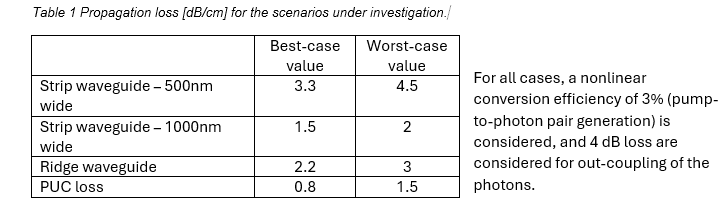


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axis import Axis 
from matplotlib import ticker
import seaborn as sns

In [22]:
sns.set_style("whitegrid")
sns.set_context("poster", font_scale=0.5)
sns.set_palette("viridis") 

palette = sns.color_palette('viridis', 10)
sns.color_palette('viridis', 10)
plt.rcParams['axes.edgecolor']='#D3D4D9'

## Functions

In [6]:
#dB to percent converter
def db_to_pc(dB):
    return 10 ** (dB / 10)

#attenuation: takes length in mm and and gives att in dB/cm
def att(length, loss):
    return (loss * length/10)

#attenuation vs number of pucs
def pucs_att(n, loss_puc):
    return n*loss_puc

### Examples of usage


In [7]:
# Example usage
dB = -3
pc = db_to_pc(dB)
print(f"{dB} dB is equivalent to {pc:.2f}%")

-3 dB is equivalent to 0.50%


In [9]:
# Example usage
l = 5.0  # in mm
loss = 3.3  # dB/cm
attenuation = att(l, loss)
print(f"The attenuation at a length of {l} mm with a loss of {loss} dB/cm is {attenuation:.2f} dB.")

The attenuation at a length of 5.0 mm with a loss of 3.3 dB/cm is 1.65 dB.


In [ ]:
loss_puc = 0.5
n = 15
att_p = pucs_att(n, loss_puc)
print(f"The attenuation of {n} PUCS with a loss of {loss_puc} dB/PUC is {att_p:.2f} dB.")

The attenuation of 15 PUCS with a loss of 0.5 dB is 7.50 dB.


## Parameters best case scenario

In [11]:
# Define the waveguide parameters
loss_best = [-3.3, -1.5, -2.2]   # dB/cm strip waveguides 0.5 um 1um and ridge
puc_lossb= -0.8 #dB/puc in best scenario

#PUMP Rates
pump = [1250, 625, 312.5, 156.25] #pump rates in MHz
ce_nlp = 0.03 #conversion efficiency of nonlinear process of pump 

### case 1: from top left to bottom left

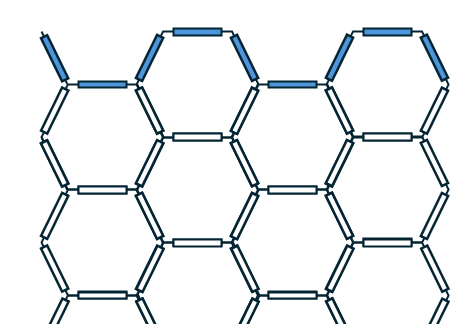


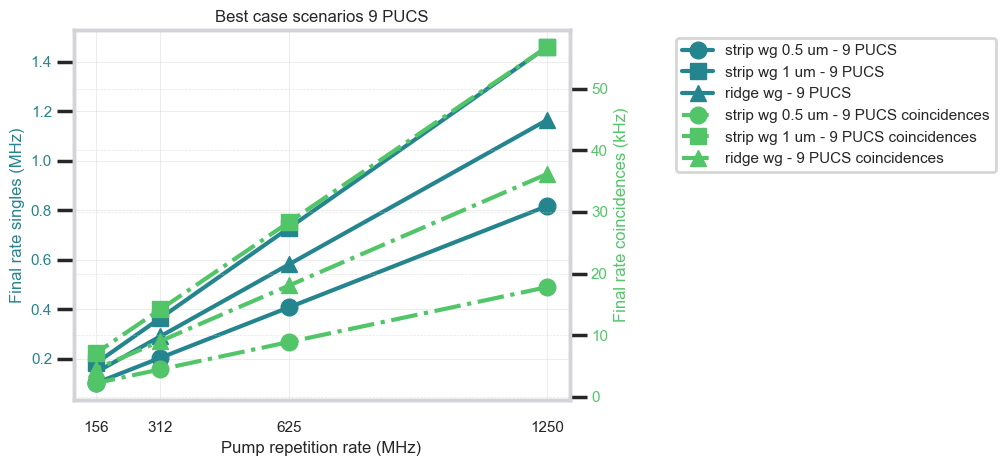

In [24]:
#Lengths 
len1 = 7 #in mm, length to the signal mesh
# Calculate the attenuation at len1 for each loss value
att_len1 = np.zeros(len(loss_best))
for i, loss in enumerate(loss_best):  
    att_len1[i] = db_to_pc(att(len1, loss))

n1 = 9 #number of puc from top left to top right
puc_l1b =  n1*puc_lossb
att_pucs1 = db_to_pc(puc_l1b)
att_fil = db_to_pc(puc_lossb)
att_conn =db_to_pc(-4) #attenuation connectors


#coincidences 
len1c=2*len1
att_len1c = np.zeros(len(loss_best))
for i, loss in enumerate(loss_best):  
    att_len1c[i] = db_to_pc(att(len1c, loss))
   

n1c = 2*n1 #number of puc from top left to top right
puc_l1bc =  n1c*puc_lossb
att_pucs1c = db_to_pc(puc_l1bc)
att_filc = db_to_pc(2*puc_lossb)
att_connc =db_to_pc(-8) #attenuation connectors



# Calculate the final rate for each pump value and loss value for singles
final_rate = np.zeros((len(pump), len(loss_best)))
for i, p in enumerate(pump):
    for j, loss in enumerate(loss_best):
        final_rate[i, j] = p * ce_nlp * att_fil* att_len1[j] * att_pucs1 * att_len1[j] *att_conn


# Calculate the final rate for each pump value and loss value coincidences
final_ratec = np.zeros((len(pump), len(loss_best)))
for i, p in enumerate(pump):
    for j, loss in enumerate(loss_best):
        final_ratec[i, j] = p * ce_nlp * att_filc* att_len1c[j] * att_pucs1c * att_len1c[j] *att_connc



markers = ['o', 's', '^']  # Circle, Square, Triangle

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot the first dataset with the primary y-axis (ax1)
for i, waveguide in enumerate(["strip wg 0.5 um", "strip wg 1 um", "ridge wg"]):
    ax1.plot(pump, final_rate[:, i], label=f"{waveguide} - 9 PUCS", color=palette[4], marker=markers[i], linestyle='-')

# Set labels for the primary y-axis
ax1.set_xlabel("Pump repetition rate (MHz)")

ax1.set_ylabel("Final rate singles (MHz)", color=palette[4])
ax1.tick_params(axis='y', labelcolor=palette[4])

ax2 = ax1.twinx()

# Plot the second dataset with the secondary y-axis (ax2)
for i, waveguide in enumerate(["strip wg 0.5 um", "strip wg 1 um", "ridge wg"]):
    ax2.plot(pump, final_ratec[:, i]*1000, label=f"{waveguide} - 9 PUCS coincidences", color=palette[7], marker=markers[i], linestyle='-.')

# Set labels for the secondary y-axis
ax2.set_ylabel("Final rate coincidences (kHz)", color=palette[7])
ax2.tick_params(axis='y', labelcolor = palette[7])

# Set minor tick locator and tick parameters for both y-axes
ax1.set_xticks( [1250, 625, 312.5, 156.25])


ax2.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
ax1.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.5)

# Add a title and a legend
ax1.set_title("Best case scenarios 9 PUCS")
fig.legend(loc="upper left", bbox_to_anchor=(1.2,1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()


### case 2:  5x5 matrix

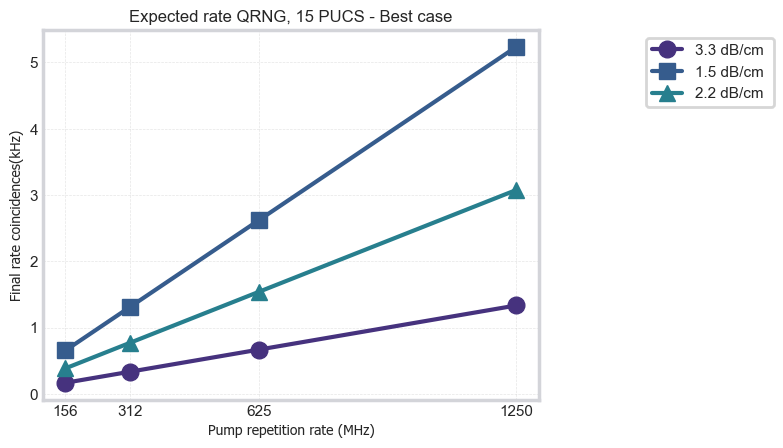

In [26]:
len2 = (len1 + 2.5) #in mm, length of the signal mesh
# Calculate the attenuation at len2 for each loss value
att_len2 = np.zeros(len(loss_best))
for i, loss in enumerate(loss_best):
    att_len2[i] = db_to_pc(att(len2, loss))
    

#case 2: from top left to bottom right signal
n2= 15 #number of puc top left to bottom right
puc_l2b= n2*puc_lossb
#input we have 
att_fil = db_to_pc(puc_lossb) #filter after source
#att len1
att_pucs2 = db_to_pc(puc_l2b) #att given by 13 PUCs
#att len2
att_conn = db_to_pc(-4) #attenuation connectors


#coincidences 
len2c=2*len2
# Calculate the attenuation at len2 for each loss value
att_len2c = np.zeros(len(loss_best))
for i, loss in enumerate(loss_best):
    att_len2c[i] = db_to_pc(att(len2c, loss))
    

#case 2: from top left to bottom right signal
n2c = 2*n2 #number of puc top left to bottom right
puc_l2bc = n2c*puc_lossb
#input we have 
att_filc = db_to_pc(2*puc_lossb) #filter after source
#att len1
att_pucs2c = db_to_pc(puc_l2bc) #att given by 13 PUCs
#att len2
att_connc = db_to_pc(-8) #attenuation connectors

# Calculate the final rate for each pump value and loss value
final_rate2 = np.zeros((len(pump), len(loss_best)))
for i, p in enumerate(pump):
    for j, loss in enumerate(loss_best):
        final_rate2[i, j] = p * ce_nlp *att_fil* att_len1[j] * att_pucs2 * att_len2[j] * att_conn 
        

# Calculate the final rate for each pump value and loss value
final_rate2c = np.zeros((len(pump), len(loss_best)))
for i, p in enumerate(pump):
    for j, loss in enumerate(loss_best):
        final_rate2c[i, j] = p * ce_nlp *att_filc* att_len1c[j] * att_pucs2c * att_len2c[j] * att_connc 
        


# Define unique markers for each waveguide
markers = ['o', 's', '^']  # Circle, Square, Triangle

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot the first dataset with the primary y-axis (ax1)
for i, waveguide in enumerate(["3.3 dB/cm", "1.5 dB/cm ", "2.2 dB/cm"]):
    ax1.plot(pump, final_rate2c[:, i]*1000, label=f"{waveguide}", marker=markers[i], linestyle='-')

# Set labels for the primary y-axis
ax1.set_xlabel("Pump repetition rate (MHz)", fontdict={'family': 'Tahoma', 'size': 10})
ax1.set_ylabel("Final rate coincidences(kHz)",  fontdict={'family': 'Tahoma', 'size': 10})
ax1.tick_params(axis='y', size= 5)

# Create a second y-axis (ax2) that shares the same x-axis


ax1.grid(visible=True, alpha=0.5, linestyle='--', linewidth=0.5)

# Set minor tick locator and tick parameters for both y-axes
ax1.set_xticks( [1250, 625, 312.5, 156.25])


ax1.tick_params(which='major', width=1.00, length=5, direction='in')
ax1.tick_params(which='minor', width=0.75, length=2.5, labelsize=8, direction='in')


# Add a title and a legend
ax1.set_title("Expected rate QRNG, 15 PUCS - Best case")
fig.legend(loc="upper left", bbox_to_anchor=(1.2,1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()

### case 3: from top left to middle

In [29]:
len3 = 5 #in mm, length of the idler mesh
len4 = 20  #in mm, length of the classical mesh
# Calculate the attenuation at len2 for each loss value
att_len3 = np.zeros(len(loss_best))
for i, loss in enumerate(loss_best):
    att_len3[i] = db_to_pc(att(len3, loss))
    
att_len4 = np.zeros(len(loss_best))
for i, loss in enumerate(loss_best):
    att_len4[i] = db_to_pc(att(len4, loss))

In [30]:
#case3: 20 PUCs from top left to middle
n3= 15
puc_l3b=n3*puc_lossb
#input we have 
att_fil = db_to_pc(puc_lossb) #filter after source
#att len1
att_pucs3 = db_to_pc(puc_l3b) #att given by 13 PUCs
#att len3 to the end of the chip
att_bs= db_to_pc(-3) #att beam splitter
#att from the bs to the last wg, something like 6 mm which is l1 
#att len4
att_conn = db_to_pc(-2) #attenuation connectors

In [31]:
# Calculate the final rate for each pump value and loss value
final_rate3 = np.zeros((len(pump), len(loss_best)))
for i, p in enumerate(pump):
    for j, loss in enumerate(loss_best):
        final_rate3[i, j] = p * ce_nlp *att_fil* att_len1[j] * att_pucs3 * att_len3[j] * att_bs *att_len1[j] * att_len4[j] * att_conn 
        

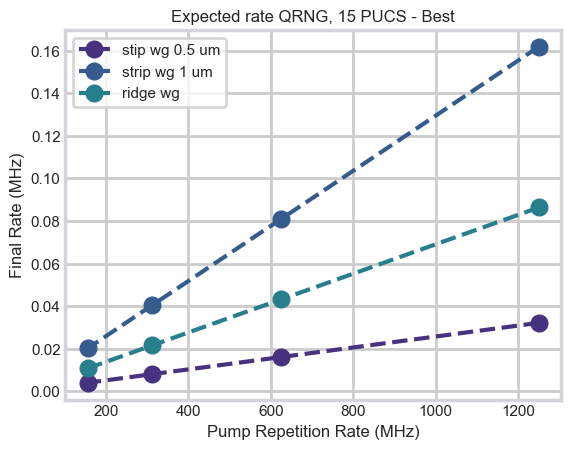

In [32]:
# Plot the results
fig, ax = plt.subplots()
for i, waveguide in enumerate(["stip wg 0.5 um", "strip wg 1 um", "ridge wg"]):
    ax.plot(pump, final_rate3[:, i], label=waveguide, marker='o', linestyle= '--')
ax.set_xlabel("Pump Repetition Rate (MHz)")
ax.set_ylabel("Final Rate (MHz)")
ax.tick_params(axis='both', direction='in')
ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.005))
ax.tick_params(which='major', width=1.00, length=5)
ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10, direction='in')
ax.set_title("Expected rate QRNG, 15 PUCS - Best")
ax.legend()
plt.show()

### case 4: whole chip

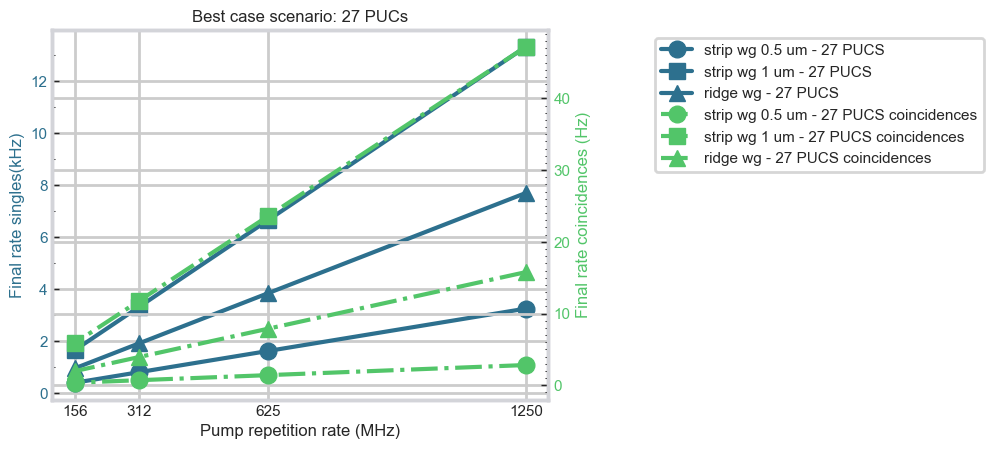

In [35]:
#case4: 27 PUCs from top left to middle
len3 = 5 #in mm, length of the idler mesh
len4 = 20  #in mm, length of the classical mesh
# Calculate the attenuation at len2 for each loss value
att_len3 = np.zeros(len(loss_best))
for i, loss in enumerate(loss_best):
    att_len3[i] = db_to_pc(att(len3, loss))
    
att_len4 = np.zeros(len(loss_best))
for i, loss in enumerate(loss_best):
    att_len4[i] = db_to_pc(att(len4, loss))
    
n4= 27
puc_l4b=n4*puc_lossb
#input we have 
att_fil = db_to_pc(puc_lossb) #filter after source
#att len1
att_pucs4 = db_to_pc(puc_l4b) #att given by 27 PUCs
att_bs= db_to_pc(-3) #att beam splitter
#att from the bs to the last wg, something like 6 mm which is l1 
#att len4
att_conn = db_to_pc(-4) #attenuation connectors

#coincidences
len3 = 5 #in mm, length of the idler mesh
len4c = 2*20  #in mm, length of the classical mesh
# Calculate the attenuation at len2 for each loss value
att_len3 = np.zeros(len(loss_best))
for i, loss in enumerate(loss_best):
    att_len3[i] = db_to_pc(att(len3, loss))
    
att_len4c = np.zeros(len(loss_best))
for i, loss in enumerate(loss_best):
    att_len4c[i] = db_to_pc(att(len4c, loss))
    
    

#case4: 27 PUCs from top left to middle
n4c= 2*n4
puc_l4bc=n4c*puc_lossb
#input we have 
att_filc = db_to_pc(2*puc_lossb) #filter after source
#att len1
att_pucs4c = db_to_pc(puc_l4bc) #att given by 27 PUCs
att_bsc= db_to_pc(-6) #att beam splitter
#att from the bs to the last wg, something like 6 mm which is l1 
#att len4
att_connc = db_to_pc(-8) #attenuation connectors

# Calculate the final rate for each pump value and loss value
final_rate4 = np.zeros((len(pump), len(loss_best)))
for i, p in enumerate(pump):
    for j, loss in enumerate(loss_best):
        final_rate4[i, j] = p * ce_nlp *att_fil* att_len1[j] * att_pucs4 * att_bs * att_len1[j] * att_len4[j] * att_conn 

# Calculate the final rate for each pump value and loss value coincidnces
final_rate4c = np.zeros((len(pump), len(loss_best)))
for i, p in enumerate(pump):
    for j, loss in enumerate(loss_best):
        final_rate4c[i, j] = p * ce_nlp *att_filc* att_len1c[j] * att_pucs4c * att_bsc * att_len1c[j] * att_len4c[j] * att_connc 

# Define unique markers for each waveguide
markers = ['o', 's', '^']  # Circle, Square, Triangle

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot the first dataset with the primary y-axis (ax1)
for i, waveguide in enumerate(["strip wg 0.5 um", "strip wg 1 um", "ridge wg"]):
    ax1.plot(pump, final_rate4[:, i]*1000, label=f"{waveguide} - 27 PUCS", color=palette[3], marker=markers[i], linestyle='-')

# Set labels for the primary y-axis
ax1.set_xlabel("Pump repetition rate (MHz)")
ax1.set_ylabel("Final rate singles(kHz)", color=palette[3])
ax1.tick_params(axis='y', labelcolor=palette[3])
ax1.grid(which='major', axis='both',  linestyle='-')

# Create a second y-axis (ax2) that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset with the secondary y-axis (ax2)
for i, waveguide in enumerate(["strip wg 0.5 um", "strip wg 1 um", "ridge wg"]):
    ax2.plot(pump, final_rate4c[:, i]*10e6, label=f"{waveguide} - 27 PUCS coincidences", color=palette[7], marker=markers[i], linestyle='-.')

# Set labels for the secondary y-axis
ax2.set_ylabel("Final rate coincidences (Hz)", color=palette[7])
ax2.tick_params(axis='y', labelcolor= palette[7])

# Set minor tick locator and tick parameters for both y-axes
ax1.set_xticks( [1250, 625, 312.5, 156.25])
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(78))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

ax1.tick_params(which='major', width=1.00, length=5, direction='in')
ax1.tick_params(which='minor', width=0.75, length=2.5, labelsize=10, direction='in')
ax2.tick_params(which='major', width=1.00, length=5, direction='in')
ax2.tick_params(which='minor', width=0.75, length=2.5, labelsize=10, direction='in')

# Add a title and a legend
ax1.set_title("Best case scenario: 27 PUCs")
fig.legend(loc="upper left", bbox_to_anchor=(1.2,1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()



## Parameters worst case scenario

In [36]:
# Define the waveguide parameters
loss_worst = [-4.5, -2, -3]   # dB/cm strip waveguides 0.5 um 1um and ridge
puc_lossw= -1.5 #dB/puc in worst scenario

#PUMP Rates
pump = [1250, 625, 312.5, 156.25] #pump rates in MHz
ce_nlp = 0.03 #conversion efficiency of nonlinear process of pump 

### case 1: WCS from top left to bottom left


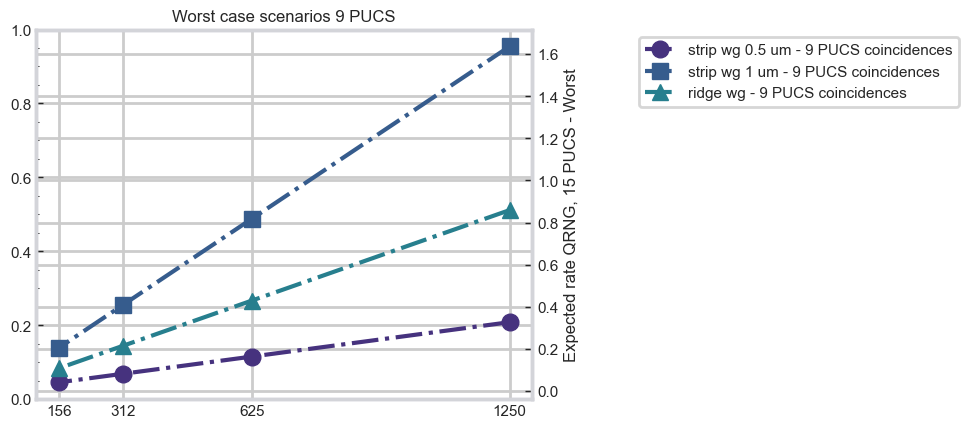

In [37]:
#Lengths 
len1 = 7 #in mm, length to the signal mesh

# Calculate the attenuation at len1 for each loss value
att_len1w = np.zeros(len(loss_worst))
for i, loss in enumerate(loss_worst):  
    att_len1w[i] = db_to_pc(att(len1, loss))

n1 = 9 #number of puc from top left to top right
puc_l1w =  n1*puc_lossw
att_pucs1w = db_to_pc(puc_l1w)
att_filw = db_to_pc(puc_lossw)
att_connw =db_to_pc(-4) #attenuation connectors


#coincidences 
len1cw=2*len1
att_len1cw = np.zeros(len(loss_worst))
for i, loss in enumerate(loss_worst):  
    att_len1cw[i] = db_to_pc(att(len1cw, loss))
   

n1c = 2*n1 #number of puc from top left to top right
puc_l1wc =  n1c*puc_lossw
att_pucs1cw = db_to_pc(puc_l1wc)
att_filcw = db_to_pc(2*puc_lossw)
att_conncw =db_to_pc(-8) #attenuation connectors

# Calculate the final rate for each pump value and loss value
final_ratew = np.zeros((len(pump), len(loss_worst)))
for i, p in enumerate(pump):
    for j, loss in enumerate(loss_worst):
        final_ratew[i, j] = p * ce_nlp * att_filw* att_len1w[j] * att_pucs1w * att_len1w[j] *att_connw


# Calculate the final rate for each pump value and loss value
final_ratecw = np.zeros((len(pump), len(loss_worst)))
for i, p in enumerate(pump):
    for j, loss in enumerate(loss_worst):
        final_ratecw[i, j] = p * ce_nlp * att_filcw* att_len1cw[j] * att_pucs1cw * att_len1cw[j] *att_conncw


# Define unique markers for each waveguide
markers = ['o', 's', '^']  # Circle, Square, Triangle

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# # Plot the first dataset with the primary y-axis (ax1)
# for i, waveguide in enumerate(["strip wg 0.5 um", "strip wg 1 um", "ridge wg"]):
#     ax1.plot(pump, final_ratew[:, i], label=f"{waveguide} - 9 PUCS", marker=markers[i], linestyle='-')

# # Set labels for the primary y-axis
# ax1.set_xlabel("Pump repetition rate (MHz)")
# ax1.set_ylabel("Final rate singles (MHz)", color=color1)

# ax1.grid(which='major', axis='both',  linestyle='-')

ax1.grid(visible=True)

ax2 = ax1.twinx()

# Plot the second dataset with the secondary y-axis (ax2)
for i, waveguide in enumerate(["strip wg 0.5 um", "strip wg 1 um", "ridge wg"]):
    ax2.plot(pump, final_ratecw[:, i]*1000, label=f"{waveguide} - 9 PUCS coincidences", marker=markers[i], linestyle='-.')

# Set labels for the secondary y-axis
ax2.set_ylabel("Expected rate QRNG, 15 PUCS - Worst")

# Set minor tick locator and tick parameters for both y-axes
ax1.set_xticks( [1250, 625, 312.5, 156.25])
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(78))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(2.5))

ax1.tick_params(which='major', width=1.00, length=5, direction='in')
ax1.tick_params(which='minor', width=0.75, length=2.5, labelsize=10, direction='in')
ax2.tick_params(which='major', width=1.00, length=5, direction='in')
ax2.tick_params(which='minor', width=0.75, length=2.5, labelsize=10, direction='in')

# Add a title and a legend
ax1.set_title("Worst case scenarios 9 PUCS")
fig.legend(loc="upper left", bbox_to_anchor=(1.2,1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()

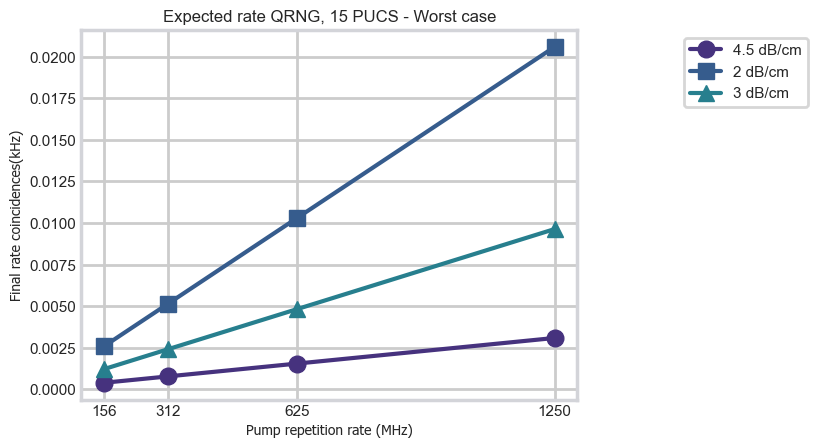

In [38]:
len2 = (len1 + 2.5) #in mm, length of the signal mesh
# Calculate the attenuation at len2 for each loss value
att_len2w = np.zeros(len(loss_worst))
for i, loss in enumerate(loss_worst):
    att_len2w[i] = db_to_pc(att(len2, loss))
    

#case 2: from top left to bottom right signal
n2= 15 #number of puc top left to bottom right
puc_l2w= n2*puc_lossw
#input we have 
att_filw = db_to_pc(puc_lossw) #filter after source
#att len1
att_pucs2w = db_to_pc(puc_l2w) #att given by 13 PUCs
#att len2
att_connw = db_to_pc(-4) #attenuation connectors


#coincidences 
len2c=2*len2
# Calculate the attenuation at len2 for each loss value
att_len2cw = np.zeros(len(loss_worst))
for i, loss in enumerate(loss_worst):
    att_len2cw[i] = db_to_pc(att(len2c, loss))
    

#case 2: from top left to bottom right signal
n2c = 2*n2 #number of puc top left to bottom right
puc_l2wc = n2c*puc_lossw
#input we have 
att_filcw = db_to_pc(2*puc_lossw) #filter after source
#att len1
att_pucs2cw = db_to_pc(puc_l2wc) #att given by 13 PUCs
#att len2
att_conncw = db_to_pc(-8) #attenuation connectors

# Calculate the final rate for each pump value and loss value
final_rate2w = np.zeros((len(pump), len(loss_worst)))
for i, p in enumerate(pump):
    for j, loss in enumerate(loss_worst):
        final_rate2w[i, j] = p * ce_nlp *att_filw* att_len1w[j] * att_pucs2w * att_len2w[j] * att_connw
        

# Calculate the final rate for each pump value and loss value
final_rate2cw = np.zeros((len(pump), len(loss_worst)))
for i, p in enumerate(pump):
    for j, loss in enumerate(loss_worst):
        final_rate2cw[i, j] = p * ce_nlp *att_filcw* att_len1cw[j] * att_pucs2cw * att_len2cw[j] * att_conncw 
        


       


# Define unique markers for each waveguide
markers = ['o', 's', '^']  # Circle, Square, Triangle

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot the first dataset with the primary y-axis (ax1)
for i, waveguide in enumerate(["4.5 dB/cm", "2 dB/cm ", "3 dB/cm"]):
    ax1.plot(pump, final_rate2cw[:, i]*1000, label=f"{waveguide}", marker=markers[i], linestyle='-')

# Set labels for the primary y-axis
ax1.set_xlabel("Pump repetition rate (MHz)", fontdict={'family': 'Tahoma', 'size': 10})
ax1.set_ylabel("Final rate coincidences(kHz)",  fontdict={'family': 'Tahoma', 'size': 10})
ax1.tick_params(axis='y', size= 5)

# Create a second y-axis (ax2) that shares the same x-axis


ax1.grid(visible=True)

# Set minor tick locator and tick parameters for both y-axes
ax1.set_xticks( [1250, 625, 312.5, 156.25])


ax1.tick_params(which='major', width=1.00, length=5, direction='in')
ax1.tick_params(which='minor', width=0.75, length=2.5, labelsize=8, direction='in')


# Add a title and a legend
ax1.set_title("Expected rate QRNG, 15 PUCS - Worst case")
fig.legend(loc="upper left", bbox_to_anchor=(1.2,1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()



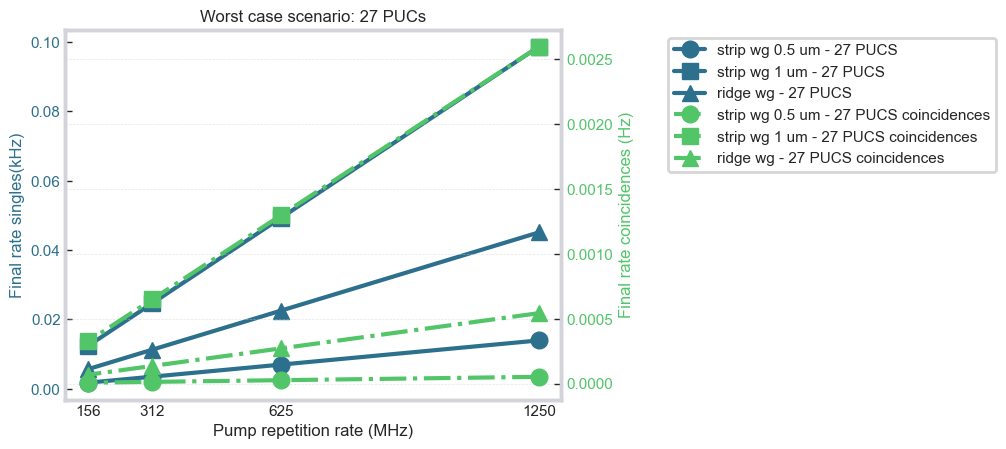

In [42]:
#case4: 27 PUCs from top left to middle
len3 = 5 #in mm, length of the idler mesh
len4 = 20  #in mm, length of the classical mesh
# Calculate the attenuation at len2 for each loss value
att_len3w = np.zeros(len(loss_worst))
for i, loss in enumerate(loss_worst):
    att_len3w[i] = db_to_pc(att(len3, loss))
    
att_len4w = np.zeros(len(loss_worst))
for i, loss in enumerate(loss_worst):
    att_len4w[i] = db_to_pc(att(len4, loss))
    
n4= 27
puc_l4w=n4*puc_lossw
#input we have 
att_filw = db_to_pc(puc_lossw) #filter after source
#att len1
att_pucs4w = db_to_pc(puc_l4w) #att given by 27 PUCs
att_bsw= db_to_pc(-3) #att beam splitter
#att from the bs to the last wg, something like 6 mm which is l1 
#att len4
att_connw = db_to_pc(-4) #attenuation connectors

#coincidences
len3 = 5 #in mm, length of the idler mesh
len4c = 2*20  #in mm, length of the classical mesh
# Calculate the attenuation at len2 for each loss value
    
att_len4cw = np.zeros(len(loss_worst))
for i, loss in enumerate(loss_worst):
    att_len4cw[i] = db_to_pc(att(len4c, loss))
    
    

#case4: 27 PUCs from top left to middle
n4c= 2*n4
puc_l4wc=n4c*puc_lossw
#input we have 
att_filcw = db_to_pc(2*puc_lossw) #filter after source
#att len1
att_pucs4cw = db_to_pc(puc_l4wc) #att given by 27 PUCs
att_bscw= db_to_pc(-6) #att beam splitter
#att from the bs to the last wg, something like 6 mm which is l1 
#att len4
att_conncw = db_to_pc(-8) #attenuation connectors

# Calculate the final rate for each pump value and loss value
final_rate4w = np.zeros((len(pump), len(loss_worst)))
for i, p in enumerate(pump):
    for j, loss in enumerate(loss_worst):
        final_rate4w[i, j] = p * ce_nlp *att_filw* att_len1w[j] * att_pucs4w * att_bsw * att_len1w[j] * att_len4w[j] * att_connw 

# Calculate the final rate for each pump value and loss value coincidnces
final_rate4cw = np.zeros((len(pump), len(loss_worst)))
for i, p in enumerate(pump):
    for j, loss in enumerate(loss_worst):
        final_rate4cw[i, j] = p * ce_nlp *att_filcw* att_len1cw[j] * att_pucs4cw * att_bscw * att_len1cw[j] * att_len4cw[j] * att_conncw 

# Define unique markers for each waveguide
markers = ['o', 's', '^']  # Circle, Square, Triangle

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot the first dataset with the primary y-axis (ax1)
for i, waveguide in enumerate(["strip wg 0.5 um", "strip wg 1 um", "ridge wg"]):
    ax1.plot(pump, final_rate4w[:, i]*1000, label=f"{waveguide} - 27 PUCS", color=palette[3], marker=markers[i], linestyle='-')

# Set labels for the primary y-axis
ax1.set_xlabel("Pump repetition rate (MHz)")
ax1.set_ylabel("Final rate singles(kHz)", color=palette[3])
ax1.tick_params(axis='y', labelcolor=palette[3])
ax1.grid(False)

# Create a second y-axis (ax2) that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset with the secondary y-axis (ax2)
for i, waveguide in enumerate(["strip wg 0.5 um", "strip wg 1 um", "ridge wg"]):
    ax2.plot(pump, final_rate4cw[:, i]*10e6, label=f"{waveguide} - 27 PUCS coincidences", color=palette[7], marker=markers[i], linestyle='-.')

# Set labels for the secondary y-axis
ax2.set_ylabel("Final rate coincidences (Hz)", color=palette[7])
ax2.tick_params(axis='y', labelcolor= palette[7])

# Set minor tick locator and tick parameters for both y-axes
ax1.set_xticks( [1250, 625, 312.5, 156.25])
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(78))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

ax1.tick_params(which='major', width=1.00, length=5, direction='in')
ax1.tick_params(which='minor', width=0.75, length=2.5, labelsize=10, direction='in')
ax2.tick_params(which='major', width=1.00, length=5, direction='in')
ax2.tick_params(which='minor', width=0.75, length=2.5, labelsize=10, direction='in')
ax2.grid(axis='both', linestyle='--', linewidth=0.5, alpha=0.5)
# Add a title and a legend
ax1.set_title("Worst case scenario: 27 PUCs")
fig.legend(loc="upper left", bbox_to_anchor=(1.2,1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()

# Probabilities

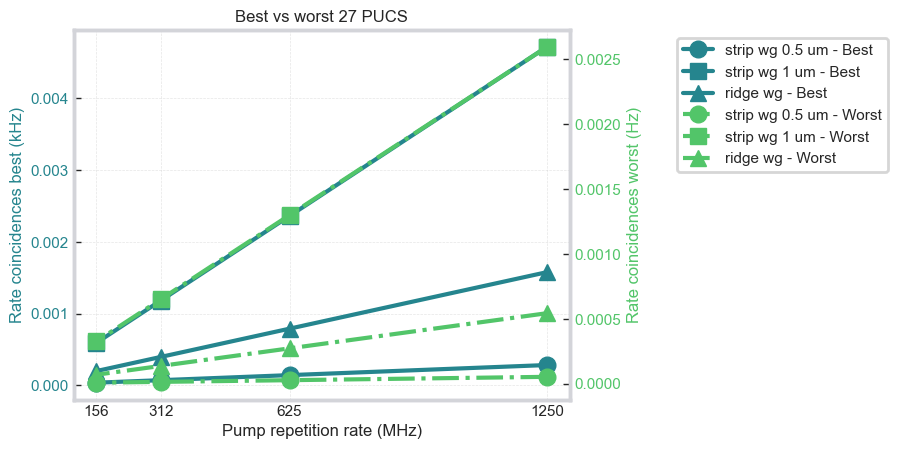

In [45]:
#Best vs worst 

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot the first dataset with the primary y-axis (ax1)
for i, waveguide in enumerate(["strip wg 0.5 um", "strip wg 1 um", "ridge wg"]):
    ax1.plot(pump, final_rate4c[:, i]*1000, label=f"{waveguide} - Best", color=palette[4], marker=markers[i], linestyle='-')

# Set labels for the primary y-axis
ax1.set_xlabel("Pump repetition rate (MHz)")
ax1.set_ylabel("Rate coincidences best (kHz)", color=palette[4])
ax1.tick_params(axis='y', labelcolor=palette[4])



ax2 = ax1.twinx()

# Plot the second dataset with the secondary y-axis (ax2)
for i, waveguide in enumerate(["strip wg 0.5 um", "strip wg 1 um", "ridge wg"]):
    ax2.plot(pump, final_rate4cw[:, i]*10e6, label=f"{waveguide} - Worst", color=palette[7], marker=markers[i], linestyle='-.')

# Set labels for the secondary y-axis
ax2.set_ylabel("Rate coincidences worst (Hz)", color=palette[7])
ax2.tick_params(axis='y', labelcolor =palette[7])

#i want to plot only the first point for each waveguide in the worst case scenario and best

# Set minor tick locator and tick parameters for both y-axes
ax1.set_xticks( [1250, 625, 312.5, 156.25])
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(78))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.125))
ax1.tick_params(which='major', width=1.00, length=5, direction='in')
ax1.tick_params(which='minor', width=0.75, length=2.5, labelsize=10, direction='in')
ax2.tick_params(which='major', width=1.00, length=5, direction='in')
ax2.tick_params(which='minor', width=0.75, length=2.5, labelsize=10, direction='in')

ax1.grid(axis='both', linestyle='--', linewidth=0.5, alpha=0.5)
ax2.grid(False)





# Add a title and a legend
ax1.set_title("Best vs worst 27 PUCS")
fig.legend(loc="upper left", bbox_to_anchor=(1.2,1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()
 
#plot only the points at 1250 MHz for 27 pucs, for 13 pucs and for 9 pucs for best and worst case scenario


# Show the plot
plt.show()
